In [1]:
## Major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## sklearn -- preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## sklearn -- metrics 
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_score, recall_score

## sklearn -- Dimens. Reduction
from sklearn.decomposition import PCA, SparsePCA, KernelPCA, MiniBatchDictionaryLearning, FastICA
from sklearn.random_projection import GaussianRandomProjection

In [2]:
## Read the Dataset
#FILE_PATH = os.path.join(os.getcwd(), 'credit_card.csv')
df_credit = pd.read_csv('D:/Test/creditcard.csv')

## check the head
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Check some info, datatypes and nulls
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
## Check some statistics about the data
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
## Split the Data to Features and Target
X = df_credit.drop(columns=['Class'], axis=1)
y = df_credit['Class']

In [6]:
## Split the Dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2018, stratify=df_credit['Class'])

In [7]:
## Pipeline

num_pipeline = Pipeline(steps=[
                              ('scaler', StandardScaler())
                              ]
                        )
## fit and transform
X_train_final = num_pipeline.fit_transform(X_train)
X_test_final = num_pipeline.transform(X_test)

In [8]:
## Creat the Anomaly Function
def anomaly_scores(X_original, X_reconstructed):
    loss = np.sum((X_original - X_reconstructed)**2, axis=1)  ## axis=1 -- I need for each instance (take care)
    loss = (loss - np.min(loss)) / (np.max(loss) -  np.min(loss))  ## Normalize using (min-max range)
    return loss

In [9]:
## Defina a full function for evaluation (plotting precision_recall curve, ROC_curve)
def evaluate_score(y_true, y_anomaly_scores, return_df=False):
      ## concat the true and scores
    df = pd.DataFrame({'True Labels': y_true, 'Anomaly Scores': y_anomaly_scores}).reset_index()
    df = df.drop(columns=['index'], axis=1)
    
    ## Precision and Recall curve
    precision, recall, thresholds = precision_recall_curve(y_true=df['True Labels'], probas_pred=df['Anomaly Scores'])
    
    ## Avearge Precision is the area under (precision-recall curve)
    average_precision = average_precision_score(y_true=df['True Labels'], y_score=df['Anomaly Scores'])

    ## Plotting the precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    plt.title(f'Precision-Recall curve: Average Precision = {average_precision:.2f}', fontsize=14)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.grid('on')
    plt.show()


    ## ROC curve
    fpr, tpr, thresholds = roc_curve(y_true=df['True Labels'], y_score=df['Anomaly Scores'])
    ## area under curve
    auc = roc_auc_score(y_true=df['True Labels'], y_score=df['Anomaly Scores'])

    ## plotting roc curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='r', linewidth=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', linewidth=2, linestyle='--')
    plt.scatter(0, 0, s=40, c='k')
    plt.scatter(1, 1, s=40, c='k')
    plt.title(f'Receiver operating characteristic: Area under the curve {auc:.2f}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate = Recall', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid('on')
    plt.show()
    
    if return_df==True:
        return df

In [10]:
## Define a ScatterPlot Fuction

def plot_two_comp(X_reduced, y_true, algo_name):
    ## Plotting the (First Vector & Second Vector) coressponding to each (label)
    df_two_vectors = pd.DataFrame(np.c_[X_reduced[:, [0, 1]], y_true], 
                                  columns=['First Vector', 'Second Vector', 'Label'])

    ## Plotting
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors, fit_reg=False)
    plt.title(f'Using {algo_name}', fontsize=14, c='k')
    plt.show()

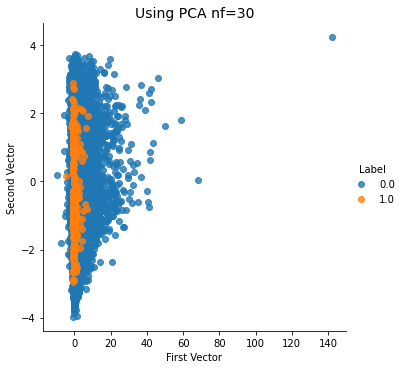

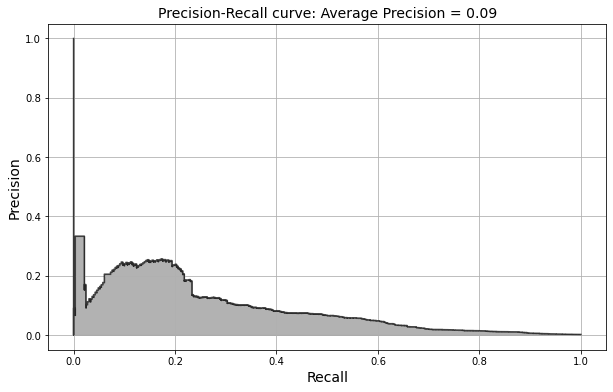

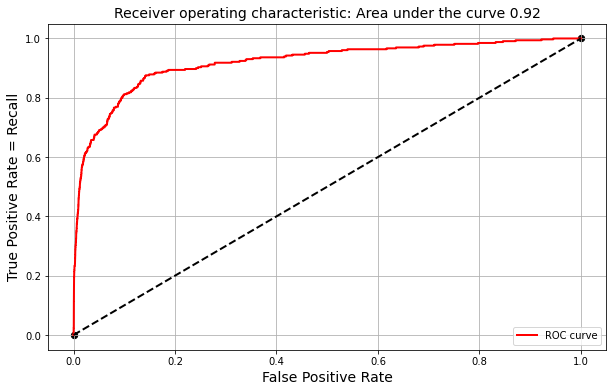

In [11]:
## Try PCA with 100% Features (30 Features)
pca_30 = PCA(n_components=30, random_state=45)

## Fit and transform for train, transform only for test
X_train_reduced_pca30 = pca_30.fit_transform(X_train_final)

## Inverse (Reconstruct)
X_train_inverse_pca30 = pca_30.inverse_transform(X_train_reduced_pca30)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_pca30, y_true=y_train, algo_name='PCA nf=30')

## Getting Anomaly Scores -- call the function
y_scores_pca30 = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_pca30)

## Plotting Evaluation plots -- call the function
evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca30)

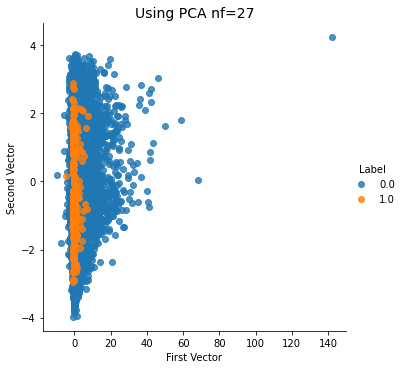

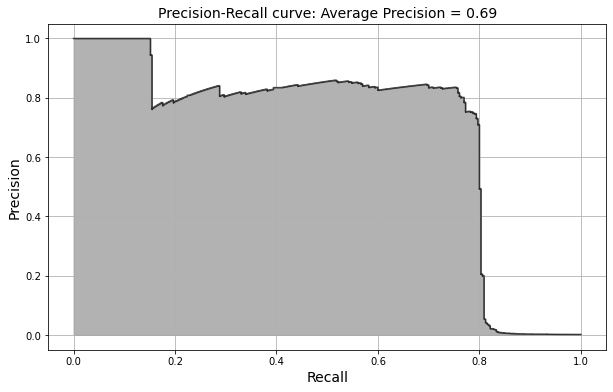

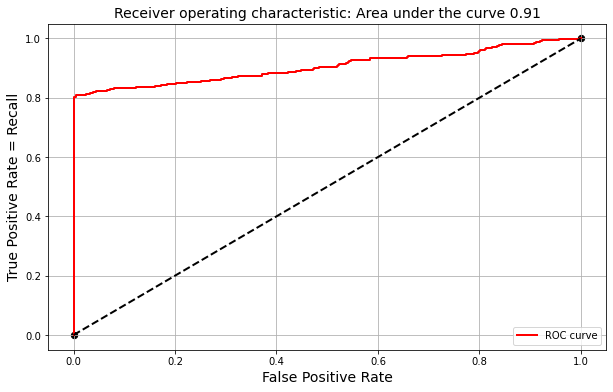

,True Labels,Anomaly Scores
0,0,0.000179
1,0,0.000029
2,0,0.000182
3,0,0.000135
4,0,0.000418
...,...,...
190815,0,0.000102
190816,0,0.000039
190817,0,0.000110
190818,0,0.000149


In [16]:
## Try PCA with 27 Features
pca_27 = PCA(n_components=27, random_state=2018)  ## The same random_state

## Fit and transform for train, transform only for test
X_train_reduced_pca_27 = pca_27.fit_transform(X_train_final)

## Inverse (Reconstruct)
X_train_inverse_pca_27 = pca_27.inverse_transform(X_train_reduced_pca_27)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_pca_27, y_true=y_train, algo_name='PCA nf=27')

## Getting Anomaly Scores -- call the function
y_scores_pca27 = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_pca_27)

## Plotting Evaluation plots -- call the function
df_pca27 = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca27, return_df=True)
df_pca27

In [17]:
## Sort descending according to scores
df_pca27 = df_pca27.sort_values(by='Anomaly Scores', ascending=False)
df_pca27

,True Labels,Anomaly Scores
53084,1,1.000000e+00
155989,1,9.017986e-01
21774,1,9.017986e-01
87283,1,9.017986e-01
143493,1,9.017986e-01
...,...,...
62495,0,2.307548e-08
50570,0,2.291151e-08
110088,0,1.849888e-08
59785,0,3.777973e-09
